In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Jouer avec les digits

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

**Question** Afficher et lire la description de ces données (attribut `DESCR`)

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
print(mnist.details)

{'id': '554', 'name': 'mnist_784', 'version': '1', 'format': 'ARFF', 'upload_date': '2014-09-29T03:28:38', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-03 21:23:30', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [5]:
print(mnist.feature_names)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [6]:
print(mnist.data.shape)
print(mnist.target.shape)
print(mnist.target_names)

(70000, 784)
(70000,)
['class']


**Question** Appeler `X` et `y` les données et la cible. Découper en `X_train`, `y_train`, `X_test`, `y_test` selon les indications données dans la description.

In [7]:
X_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
y_df = pd.DataFrame(data=mnist.target, columns=mnist.target_names)

X = mnist.data
y = mnist.target.reshape(-1,1)

print("X_df.shape: " + str(X_df.shape) + ", y_df.shape: " + str(y_df.shape))
print("X.shape: " + str(X.shape) + ", y.shape: " + str(y.shape))

X_df.shape: (70000, 784), y_df.shape: (70000, 1)
X.shape: (70000, 784), y.shape: (70000, 1)


In [8]:
# ... It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.14285, random_state=42)

print("X_train.shape: " + str(X_train.shape) + ", y_train.shape: " + str(y_train.shape))
print("X_test.shape: " + str(X_test.shape) + ", y_test.shape: " + str(y_test.shape))

X_train.shape: (60000, 784), y_train.shape: (60000, 1)
X_test.shape: (10000, 784), y_test.shape: (10000, 1)


On peut visualiser quelques digits par ce petit code

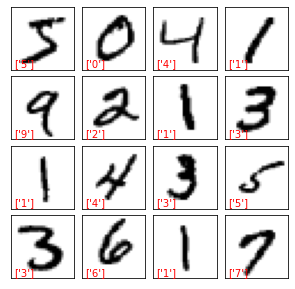

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap='binary')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, 
            color='red')

**Question** Créer  4 classifieurs de classe suivante. On prendra 5 voisins pour le $k$-plus proches voisins, et une profondeur de 20 pour les arbres de décision. Les mémoriser dans une liste `methods` pour plus de facilité.  

In [10]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
gnb = GaussianNB()
svc = SVC()
sgd = SGDClassifier()
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=20)
knn = KNeighborsClassifier(5)
methods = [gnb, dt, sgd, knn, lr, svc]

On considère les tailles de 100 à 4100 par pas de 1000. Par la suite on prendra des sous-échantillon de `X_train` tiré au hasard des tailles considérées (vous jouerez sur les indices plutôt que sur les données!!)

    sizes = list(range(100, 5000, 1000)) 

In [12]:
sizes = list(range(100, 5000, 1000)) 
print(sizes)

[100, 1100, 2100, 3100, 4100]


# Mesurer les temps d'exécution

**Question** Regardez la documentation de %timeit

In [13]:
timeit?

**Question** Que fait l'instruction ? 

    r = %timeit -o -q -r1 -n1 mon_appel_de_fonction

*Réponse* : 

timeit: Time execution of a Python statement or expression

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
best result.
Default: 7

-q: Quiet, do not print result.

-o: return a TimeitResult that can be stored in a variable to inspect
    the result in more details.
    
    
r contiendra le temps d'exécution de mon_appel_de_fonction, exécuté 1 fois.

**Question** Remarquez ce que donne 
  
    <instance_de_methode_de_classif>.__class__.__name__

In [14]:
for m in methods:
    print(m.__class__.__name__)

GaussianNB
DecisionTreeClassifier
SGDClassifier
KNeighborsClassifier
LogisticRegression
SVC


**Question** En utilisant cela, faites le diagramme suivant :

![temps d'exécution](./temps.png)

Dans chaque courbe, les modèles sont entraînés sur les mêmes données, qui sont des sous échantillons de `X_train` tirés au hasard de chaque taille de la liste `sizes`. 

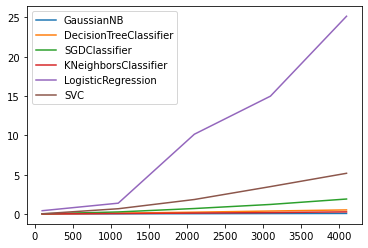

In [15]:
fig_train = plt.figure()
ax_train = plt.subplot()

for m in methods:
    tmp = []
    for s in sizes:
        tmp_x_train = X_train[0:s]
        tmp_y_train = y_train[0:s].values.reshape(-1,)
        r = %timeit -o -q -r1 -n1 m.fit(tmp_x_train, tmp_y_train)
        tmp.append(r.best)
    ax_train.plot(sizes, tmp, label=m.__class__.__name__)

ax_train.legend()
plt.show()

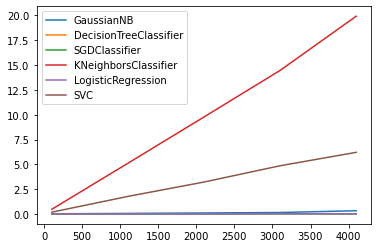

In [16]:
fig_pred = plt.figure()
ax_test = plt.subplot()

for m in methods:
    tmp = []
    for s in sizes:
        r = %timeit -o -q -r1 -n1 m.predict(X_test[0:s])
        tmp.append(r.best)
    ax_test.plot(sizes, tmp, label=m.__class__.__name__)

ax_test.legend()
plt.show()

# Mesurer les scores

**Question** Importer cross_val_score et lire la documentation

In [17]:
from sklearn.model_selection import cross_val_score

**Question** Tracer les courbes suivantes obtenues avec cross_val_score sur les différentes tailles. 

![precision](./acc.png)

(et vous voulez, car c'est plus joli... :-) )

![precision enveloppe](./acc_b.png)

/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

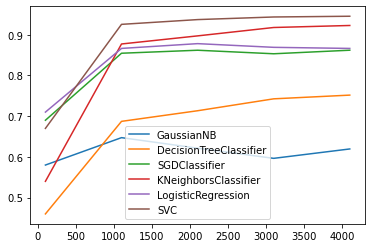

In [18]:
fig_precision = plt.figure()
ax_precision  = plt.subplot()

for m in methods:
    scores = []
    for s in sizes:
        tmp_x_train = X_train[0:s]
        tmp_y_train = y_train[0:s].values.reshape(-1,)
        scores.append(np.mean(cross_val_score(m, tmp_x_train, tmp_y_train, cv=5)))
    ax_precision.plot(sizes, scores, label=m.__class__.__name__)

ax_precision.legend()
plt.show()

# Matrice de confusion

On change de problème de classification en un problème binaire de détermination si un digit est le '3'.

In [132]:
y_train3 = (y_train == '3')
y_test3 = (y_test == '3')
print("y_train3.shape: " + str(y_train3.shape) + ", y_test3.shape: " + str(y_test3.shape))
print(y_train3)
print(y_test3)

y_train3.shape: (60000, 1), y_test3.shape: (10000, 1)
       class
23001  False
31471  False
21970  False
23585  False
10299  False
...      ...
37194  False
6265   False
54886  False
860    False
15795  False

[60000 rows x 1 columns]
       class
46730  False
48393  False
41416  False
34506  False
43725  False
...      ...
20679  False
48140  False
59195   True
12633  False
39641   True

[10000 rows x 1 columns]


**Question** Sélectionnez 5000 indices au hasard de X_train pour travailler sur un sous échantillon (nommé `Xs`, `ys`). Découpez ce sous-échantillon pour avoir un échantillon d'apprentissage et de validation. 

In [144]:
#indices = np.linspace(0,60000,num=5000, dtype=int)
#np.random.shuffle(indices)
#Xs = X_train[indices]

Xs = X_train[:5000]
ys = y_train[:5000]
print("Xs.shape: " + str(Xs.shape) + ", ys.shape: " + str(ys.shape))

Xs.shape: (5000, 784), ys.shape: (5000, 1)


In [145]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.33, random_state=42)

**Question** Entraînez tous les classifieurs sur ce sous-échantillon et calculer dans un dictionnaire `pred` toutes les prédictions de chaque méthode sur l'échantillon de validation. 

In [146]:
pred = {
    'GaussianNB': [],
    'DecisionTreeClassifier': [],
    'SGDClassifier': [],
    'KNeighborsClassifier': [],
    'LogisticRegression': [],
    'SVC': []
}

for m in methods:
    m.fit(Xs_train, ys_train.values.reshape(-1,))
    pred[m.__class__.__name__] = m.predict(Xs_test)
        


/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question** Calculer les matrices de confusion pour `lr` et `sgd`. Affichez aussi les matrices de confusion de façon graphique (`plot_confusion_matrix`)


In [23]:
from sklearn import metrics

In [147]:
confusion_lr = metrics.confusion_matrix(ys_test, pred["LogisticRegression"])
print(confusion_lr)

[[155   0   1   0   0   4   0   0   2   0]
 [  0 173   1   0   0   0   0   0   2   1]
 [  2   1 153   4   9   2   2   5   3   4]
 [  2   0   4 127   0   9   2   2   2   3]
 [  0   3   2   0 130   2   1   0   3  10]
 [  3   0   2   6   3 111   2   0   3   3]
 [  1   1   6   0   2   4 164   0   2   0]
 [  2   0   2   1   2   2   0 167   0   8]
 [  1   3   4   5   1  14   5   1 118   5]
 [  2   1   0   4   5   2   0  12   1 143]]


In [148]:
confusion_sgd = metrics.confusion_matrix(ys_test, pred["SGDClassifier"])
print(confusion_sgd)

[[160   0   0   0   0   2   0   0   0   0]
 [  0 165   0   3   0   2   0   0   7   0]
 [  7   1 148   5   7   1   3   3   8   2]
 [  3   0   3 132   0   5   0   2   5   1]
 [  2   1   2   3 130   0   1   0   5   7]
 [  6   0   1  14   4  99   1   0   6   2]
 [  3   0   2   2   1   1 167   0   4   0]
 [  6   0   1   6   2   1   0 156   5   7]
 [  6   2   0   3   1   7   1   0 135   2]
 [  5   0   0   6   8   2   0  15  14 120]]


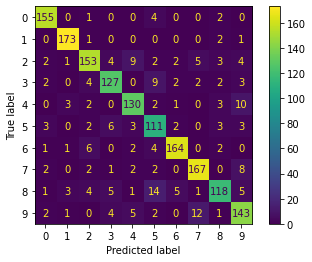

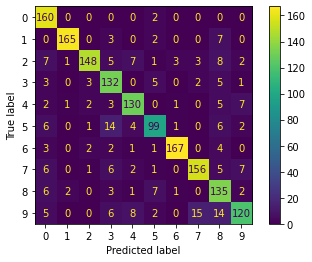

In [149]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, Xs_test, ys_test)
plot_confusion_matrix(sgd, Xs_test, ys_test)

**Question** En étudiant la matrice de confusion avec les prédictions dans `pred[lr]`, calculez 1 - le taux d'erreur (accuracy), la précision,  le rappel (sans utiliser les fonctions de `sklearn`).

En interprétant le problème comme un problème multi-classe, calculez la précision en micro et macro average

In [150]:
# Calcul pour la Class 0

c0 = {
    "tp": confusion_lr[0][0],
    "fp": np.sum(confusion_lr, axis=0)[0] - confusion_lr[0][0],
    "fn": np.sum(confusion_lr, axis=1)[0] - confusion_lr[0][0],
    "tn": np.sum(confusion_lr) - np.sum(confusion_lr, axis=0)[0] - np.sum(confusion_lr, axis=1)[0]
}

c0_accuracy = (c0["tp"] + c0["tn"]) / (c0["tp"] + c0["tn"] + c0["fp"] + c0["fn"])
c0_precion = c0["tp"] / (c0["tp"] + c0["fp"])
c0_recall = c0["tp"] / (c0["tp"] + c0["fn"])

print("c0_accuracy: " + str(c0_accuracy))
print("c0_precion: " + str(c0_precion))
print("c0_recall: " + str(c0_recall))

c0_accuracy: 0.9866220735785953
c0_precion: 0.9226190476190477
c0_recall: 0.9567901234567902


**Question**  Affichez les mêmes résultats maintenant avec les fonctions de `sklearn`. 

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("lr accuracy: " + str(accuracy_score(ys_test, pred["LogisticRegression"])))
print("lr precision macro: " + str(precision_score(ys_test, pred["LogisticRegression"], average='macro')))
print("lr precision micro: " + str(precision_score(ys_test, pred["LogisticRegression"], average='micro')))
print("lr recall macro: " + str(recall_score(ys_test, pred["LogisticRegression"], average='macro')))
print("lr recall micro: " + str(recall_score(ys_test, pred["LogisticRegression"], average='micro')))


print("sgd accuracy: " + str(accuracy_score(ys_test, pred["SGDClassifier"])))
print("sgd precision macro: " + str(precision_score(ys_test, pred["SGDClassifier"], average='macro')))
print("sgd precision micro: " + str(precision_score(ys_test, pred["SGDClassifier"], average='micro')))
print("sgd recall macro: " + str(recall_score(ys_test, pred["SGDClassifier"], average='macro')))
print("sgd recall micro: " + str(recall_score(ys_test, pred["SGDClassifier"], average='micro')))

lr accuracy: 0.8733333333333333
lr precision macro: 0.8707085922083972
lr precision micro: 0.8733333333333333
lr recall macro: 0.8709280135599039
lr recall micro: 0.8733333333333333
sgd accuracy: 0.8557575757575757
sgd precision macro: 0.8577412320044502
sgd precision micro: 0.8557575757575757
sgd recall macro: 0.854067677996259
sgd recall micro: 0.8557575757575757


**Question** Utilisez `classification_report` pour afficher les résultats sur l'échantillon `valid` par les méthodes `lr` et `sgd`

In [152]:
from sklearn.metrics import classification_report

print(classification_report(ys_test, pred["LogisticRegression"]))
print("================")
print(classification_report(ys_test, pred["SGDClassifier"]))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       162
           1       0.95      0.98      0.96       177
           2       0.87      0.83      0.85       185
           3       0.86      0.84      0.85       151
           4       0.86      0.86      0.86       151
           5       0.74      0.83      0.78       133
           6       0.93      0.91      0.92       180
           7       0.89      0.91      0.90       184
           8       0.87      0.75      0.81       157
           9       0.81      0.84      0.82       170

    accuracy                           0.87      1650
   macro avg       0.87      0.87      0.87      1650
weighted avg       0.87      0.87      0.87      1650

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       162
           1       0.98      0.93      0.95       177
           2       0.94      0.80      0.87       185
           3       0.76 

# Fonction de décision et courbe ROC

**Question** Affichez les 10 premiers scores calculés par `lr.decision_function` et les 10 premières étiquettes de l'échantillon de validation.

In [159]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ys_train_1 = le.fit_transform(ys_train)
ys_test_1 = le.fit_transform(ys_test)

print(ys_train.shape)
print(ys_train_1.shape)
print(ys_test.shape)
print(ys_test_1.shape)

#ys_train_1 = label_binarize(ys_train, classes=np.arange(0,10))

# Run classifier
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(Xs_train, ys_train_1)
y_score = classifier.decision_function(Xs_test)

#y_score = lr.decision_function(Xs_test)
print(y_score.shape)

/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(3350, 1)
(3350,)
(1650, 1)
(1650,)


/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

(1650, 10)


/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question** En utilisant `precision_recall_curve` sur les valeurs de la fonction de décision de `lr` faites le dessin suivant 

![precision et rappel selon le seuil](./prec_rec_thres.png)

In [161]:
from sklearn.metrics import precision_recall_curve

print(y_score.shape)
print(ys_test_1.shape)


precision = dict()
recall = dict()
for i in range(0,10):
    precision[i], recall[i], _ = precision_recall_curve(ys_test_1[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

(1650, 10)
(1650,)
0


IndexError: too many indices for array

**Question** Interprétez-le, en particulier les valeurs aux extrémités du graphe.

*Réponse*

**Question** Utilisez maintenant `plot_precision_recall_curve` pour tracer la courbe de précision contre rappel pour `lr`. Interprétez ce résultat.

*Réponse interprétation*